# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sofenn.FuzzyNetwork import FuzzyNetworkModel

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Read in and prep Iris Dataset

In [3]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [4]:
import pandas

In [5]:
features = pandas.DataFrame(iris.data, columns=iris.feature_names)
#features.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/features.csv', index=False)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target = pandas.DataFrame(Y, columns=iris.target_names)
#target.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/target.csv', index=False)
target.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [7]:
df = pandas.concat([pandas.DataFrame(iris.data), pandas.Series(iris.target)], axis=1)
df.columns = iris.feature_names + ['target']
#df.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris.csv', index=False)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
X_train.shape

(135, 4)

In [10]:
# OLD
fuzz = FuzzyNetworkModel(
            X_train, X_test, y_train, y_test,           # data attributes
            neurons=5, max_neurons=100,                 # initialization parameters
            )

Building Fuzzy Network with 5 neurons...
...Model successfully built!


In [11]:
# # NEW
# fuzz = FuzzyNetworkModel(
#             input_shape=(4,),          # data attributes
#             neurons=5, max_neurons=100,                 # initialization parameters
#             problem_type='classification',
#             )

In [25]:
fuzz.get_layer('FuzzyRules').get_weights()

[array([[5.3061986 , 6.3014703 , 4.9265127 , 7.4274416 , 6.9072876 ],
        [3.6966434 , 2.970308  , 2.938257  , 3.7462916 , 2.4597342 ],
        [1.103011  , 4.516378  , 1.5844958 , 6.3442507 , 6.0038342 ],
        [0.01899206, 1.431927  , 0.1514361 , 2.73304   , 2.0320377 ]],
       dtype=float32),
 array([[4.112689 , 3.7637587, 3.881348 , 3.7592082, 3.8371363],
        [3.7918262, 4.040556 , 4.034827 , 3.8185668, 3.956896 ],
        [3.867896 , 3.7398393, 3.9281912, 3.742032 , 3.868855 ],
        [3.9218009, 3.7433965, 3.8875475, 3.7430685, 3.8914769]],
       dtype=float32)]

In [26]:
fuzz.compile_model(
    init_c=True,
    sample_data=X_train,
    random_sample=True,
    init_s=True,
    s_0=4.0
)

Compiling model...


Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Inputs (InputLayer)           │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 5)                 │              40 │ Inputs[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 5)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 5)                 │              25 │ Inputs[0][0],              │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [27]:
fuzz.get_layer('FuzzyRules').get_weights()

[array([[4.7, 7.6, 6.3, 4.8, 5. ],
        [3.2, 3. , 2.9, 3. , 2. ],
        [1.6, 6.6, 5.6, 1.4, 3.5],
        [0.2, 2.1, 1.8, 0.1, 1. ]], dtype=float32),
 array([[4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.]], dtype=float32)]

In [18]:
# new
fuzz.model.fit(X_train, y_train, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.1355
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.0227
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.0372
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6667 - loss: 10.0457
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6667 - loss: 9.9997 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 9.8868
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6667 - loss: 10.0724
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6667 - loss: 9.8314
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6667 - loss: 9.7779  
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6667 - loss: 9.8009  


In [19]:
fuzz.get_layer_weights('FuzzyRules')

[array([[5.3061986 , 6.3014703 , 4.9265127 , 7.4274416 , 6.9072876 ],
        [3.6966434 , 2.970308  , 2.938257  , 3.7462916 , 2.4597342 ],
        [1.103011  , 4.516378  , 1.5844958 , 6.3442507 , 6.0038342 ],
        [0.01899206, 1.431927  , 0.1514361 , 2.73304   , 2.0320377 ]],
       dtype=float32),
 array([[4.112689 , 3.7637587, 3.881348 , 3.7592082, 3.8371363],
        [3.7918262, 4.040556 , 4.034827 , 3.8185668, 3.956896 ],
        [3.867896 , 3.7398393, 3.9281912, 3.742032 , 3.868855 ],
        [3.9218009, 3.7433965, 3.8875475, 3.7430685, 3.8914769]],
       dtype=float32)]

In [20]:
X_test

array([[5.6, 2.5, 3.9, 1.1],
       [6.2, 2.8, 4.8, 1.8],
       [5.4, 3.9, 1.3, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [6.4, 3.2, 5.3, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.1, 2.9, 4.7, 1.4],
       [6.3, 2.3, 4.4, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.7, 1.5],
       [6.4, 2.8, 5.6, 2.2],
       [6.4, 2.7, 5.3, 1.9],
       [6.5, 3. , 5.8, 2.2],
       [4.4, 3.2, 1.3, 0.2]])

In [21]:
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [22]:
y_pred = fuzz.model.predict(X_test)
y_pred.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [23]:
acc = y_test == y_pred.round()
acc

array([[ True, False,  True],
       [ True,  True, False],
       [False,  True,  True],
       [ True, False,  True],
       [ True,  True, False],
       [ True,  True, False],
       [ True, False,  True],
       [ True, False,  True],
       [ True, False,  True],
       [False,  True,  True],
       [ True, False,  True],
       [ True,  True, False],
       [ True,  True, False],
       [ True,  True, False],
       [False,  True,  True]])

In [24]:
acc.sum() / acc.size

0.6666666666666666

## Model Prediction Results

In [92]:
pred_loss, pred_bin_acc = fuzz.model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - binary_accuracy: 1.0000 - loss: 0.1047
Model Loss: 0.10472143
Binary Accuracy: 100.0%


In [93]:
fuzz.model.metrics_names

['loss', 'compile_metrics']

## Plot Results

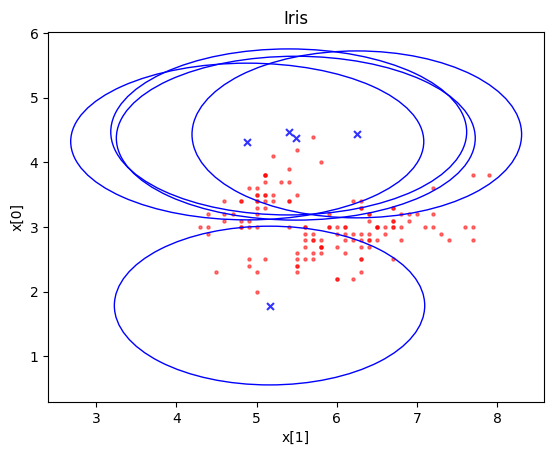

In [94]:
w = fuzz.get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()